# Try iRF on the enhancer data

This notebook runs iRF on enhancer data. It also tries to analyze the result using debiased feature importance.

In [23]:
import rpy2.robjects as robjects
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import RandomForestClassifier
from irf import irf_utils, irf_jupyter_utils
from irf.irf_utils import run_iRF
from irf.ensemble import RandomForestClassifier
from rfms.storytellers import test_feature_importance

## read the data

In [2]:
tmp = robjects.r['load']('../iRF_analyses/data/enhancer.Rdata')
print(tmp)
X = robjects.r["X"]
XX = np.asarray(X)
print(XX)
assert(len(XX[0]) == X.ncol) #same number of cols
assert(len(XX) == X.nrow)
X = XX
Y = robjects.r["Y"]
Y = np.asarray(Y)
assert(len(Y) == len(X))
test = np.asarray(robjects.r["test.id"])
train = np.asarray(robjects.r["train.id"])
varnames = np.asarray(robjects.r["varnames.all"])

[1] "X"            "Y"            "test.id"      "train.id"     "varnames.all"

[[ 6.      10.      10.      ...  0.       0.       0.     ]
 [ 6.       7.       6.      ...  0.       0.       0.     ]
 [14.       9.      14.      ...  0.       0.       1.2013 ]
 ...
 [ 9.      12.      16.      ...  2.13176  2.22051  1.20134]
 [17.      18.      14.      ...  1.49709  1.39971  1.26398]
 [13.      15.      18.      ...  2.03769  2.03994  0.     ]]


## train test split

In [3]:
X_train = X[train-1,:]
X_test = X[test-1,:]
y_train = Y[train - 1]
y_test = Y[test - 1]

## train iRF

In [4]:
y_train

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [11]:
rf = RandomForestClassifier(n_estimators=50, max_depth=5)
all_rf_weights, \
all_K_iter_rf_data, \
all_rf_bootstrap_output, \
all_rit_bootstrap_output, \
stability_score = run_iRF(X_train, X_test, y_train, y_test, rf, 
        K = 4,
        B = 100)

# Examine the stability scores

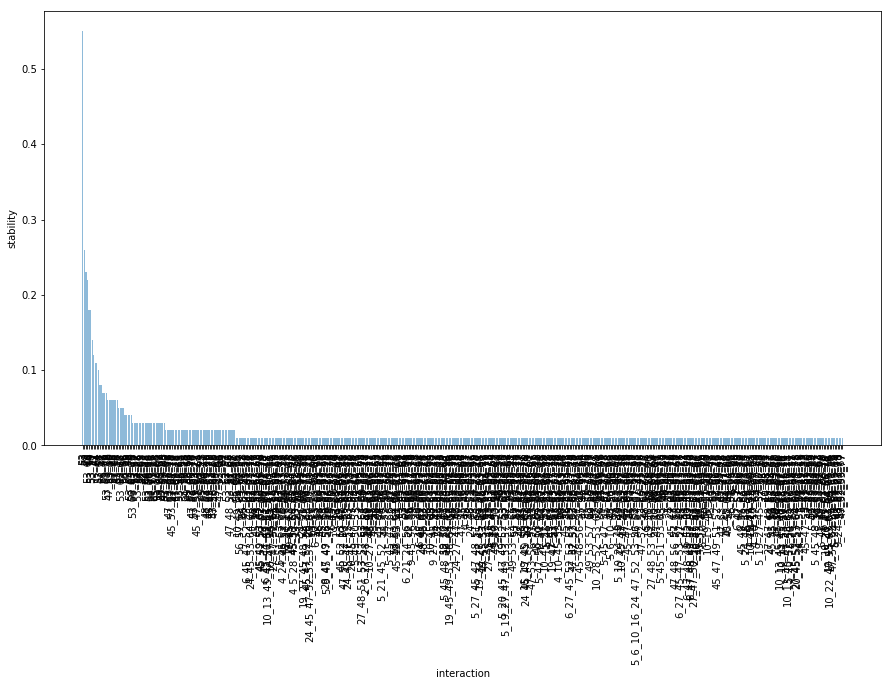

In [13]:
irf_jupyter_utils._get_histogram(stability_score, sort = True)

That's interesting - feature 22, 27, 20, 23 keep popping up!

We should probably look at the feature importances to understand if there is a useful correlation

# Examine feature importances
In particular, let us see how they change over the K iterations of random forest

['gt2' 'kr' 'med2' 'tll' 'twi' 'kr' 'cad1' 'D1' 'twi' 'hb' 'wt_ZLD' 'hb'
 'bcd' 'prdBQ' 'kni' 'ftz3' 'da2' 'run' 'dl3' 'hkb' 'H3K4me1' 'kni'
 'H3K4me1' 'prdFQ' 'sna' 'H3K18ac' 'H3K18ac' 'hkb' 'H3K27ac' 'sna'
 'H3K27ac' 'wt_H3K18ac' 'H3K9ac' 'H3' 'H3K18ac' 'wt_H3' 'H3K36me3' 'bcd'
 'H3K36me3' 'H3K4me3' 'H3' 'H3K18ac' 'H3K27me3' 'mad2' 'run' 'H3K4me3'
 'H4K5ac' 'wt_H3K4me1' 'h' 'H4K8ac' 'H3K9ac' 'H3K9ac' 'input3' 'input2'
 'hkb' 'input1' 'z2' 'H4K5ac' 'H4K8ac' 'input4' 'H4K8ac' 'H3K4me1'
 'H3K27ac' 'slp' 'H4K5ac' 'H3' 'H3' 'h' 'H4K8ac' 'H3K36me3' 'H3K27me3'
 'H3K27me3' 'H4K5ac' 'H3K4me1' 'shn' 'H3K4me3' 'H3K9ac' 'H3K27ac' 'shn'
 'H3K4me3']


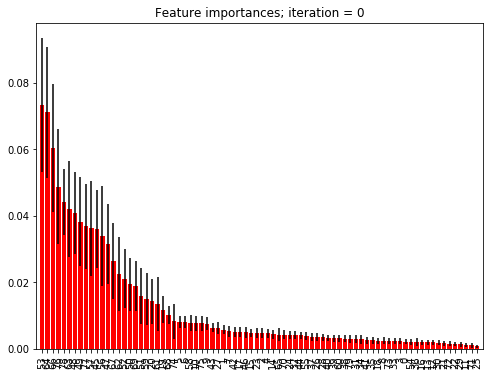

['gt2' 'kr' 'med2' 'twi' 'kr' 'twi' 'bcd' 'hb' 'hb' 'D1' 'wt_ZLD' 'cad1'
 'prdBQ' 'ftz3' 'kni' 'da2' 'tll' 'dl3' 'run' 'hkb' 'H3K4me1' 'prdFQ'
 'sna' 'H3K18ac' 'H3K18ac' 'z2' 'wt_H3K18ac' 'H3K27ac' 'H3K9ac' 'H3K4me1'
 'H3K27ac' 'H3K4me3' 'H3' 'hkb' 'H3K4me3' 'H3K9ac' 'H3' 'H3K36me3' 'wt_H3'
 'H3K18ac' 'sna' 'H3K18ac' 'input3' 'H4K8ac' 'h' 'bcd' 'H3K9ac' 'H4K5ac'
 'H3K36me3' 'H4K5ac' 'H4K5ac' 'H3K27me3' 'h' 'input1' 'H3K4me1' 'H4K5ac'
 'H3K27ac' 'H3K27me3' 'slp' 'H3K4me1' 'H3K27me3' 'H4K8ac' 'H3K36me3'
 'mad2' 'hkb' 'wt_H3K4me1' 'H4K8ac' 'run' 'H3K4me3' 'H4K8ac' 'H3K9ac'
 'kni' 'input4' 'H3' 'input2' 'H3K27ac' 'H3K4me3' 'shn' 'shn' 'H3']


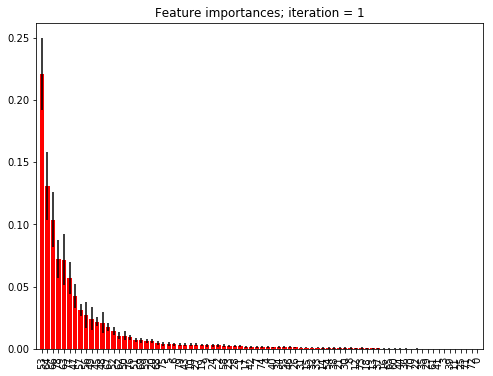

['gt2' 'kr' 'twi' 'med2' 'kr' 'twi' 'bcd' 'hb' 'hb' 'cad1' 'wt_ZLD' 'ftz3'
 'prdBQ' 'kni' 'D1' 'da2' 'H3K18ac' 'H3K18ac' 'H3K4me3' 'dl3' 'prdFQ'
 'H3K27ac' 'H3K4me1' 'sna' 'H3K9ac' 'tll' 'run' 'H3K4me1' 'H3K4me3' 'hkb'
 'z2' 'H3' 'H3K27ac' 'H3' 'wt_H3' 'H3K9ac' 'H3K27me3' 'input3' 'H3K36me3'
 'hkb' 'wt_H3K18ac' 'H3K27me3' 'H3K4me1' 'H3K18ac' 'H3K36me3' 'h' 'H3K9ac'
 'H3K4me3' 'input1' 'H3K18ac' 'H4K5ac' 'H3K27ac' 'H3K4me1' 'H4K8ac'
 'H3K36me3' 'H3' 'H3K27me3' 'H3K27ac' 'input2' 'H3K4me3' 'h' 'sna' 'slp'
 'shn' 'shn' 'run' 'mad2' 'kni' 'hkb' 'bcd' 'H3K9ac' 'wt_H3K4me1' 'input4'
 'H4K8ac' 'H4K8ac' 'H4K8ac' 'H4K5ac' 'H4K5ac' 'H4K5ac' 'H3']


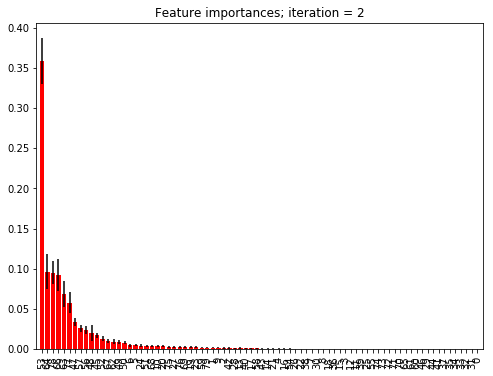

['gt2' 'twi' 'kr' 'bcd' 'med2' 'kr' 'twi' 'hb' 'hb' 'wt_ZLD' 'prdBQ'
 'ftz3' 'cad1' 'H3K18ac' 'D1' 'H3K27ac' 'kni' 'H3K9ac' 'da2' 'H3K4me3'
 'dl3' 'H3K4me1' 'H3K18ac' 'run' 'tll' 'prdFQ' 'H3K27ac' 'H3' 'H3K4me1'
 'H3K18ac' 'H3K27me3' 'hkb' 'H3K4me1' 'H3K9ac' 'h' 'H3K27me3' 'H3K36me3'
 'H3K4me3' 'H3K18ac' 'H4K8ac' 'z2' 'sna' 'H3K36me3' 'H3K4me1' 'H3K36me3'
 'H3K27ac' 'H3K27ac' 'H3' 'H3K4me3' 'H3' 'H3K4me3' 'H3K9ac' 'H3K27me3'
 'input2' 'H3K9ac' 'H4K5ac' 'sna' 'slp' 'shn' 'shn' 'run' 'mad2' 'kni'
 'hkb' 'hkb' 'h' 'bcd' 'wt_H3K4me1' 'wt_H3K18ac' 'wt_H3' 'input4' 'input3'
 'input1' 'H4K8ac' 'H4K8ac' 'H4K8ac' 'H4K5ac' 'H4K5ac' 'H4K5ac' 'H3']


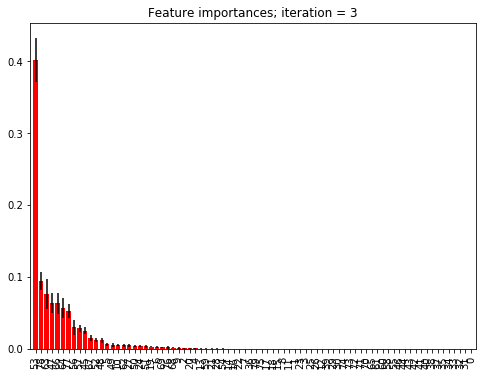

In [19]:
top = 20
for k in range(4): 
    
    iteration = "rf_iter{}".format(k)
    
    feature_importances_std = all_K_iter_rf_data[iteration]['feature_importances_std'] / rf.n_estimators ** .5
    feature_importances_rank_idx = all_K_iter_rf_data[iteration]['feature_importances_rank_idx']
    print(varnames[1,feature_importances_rank_idx])
    feature_importances = all_K_iter_rf_data[iteration]['feature_importances']

    plt.figure(figsize=(8, 6))
    title = "Feature importances; iteration = {}".format(k)
    plt.title(title)
    plt.bar(range(X_train.shape[1])
            , feature_importances[feature_importances_rank_idx]
            , color="r"
            , yerr = feature_importances_std[feature_importances_rank_idx], align="center")
    plt.xticks(range(X_train.shape[1]), feature_importances_rank_idx, rotation='vertical')
    plt.xlim([-1, X_train.shape[1]])
    plt.show()   

## calculate the debiased feature importance

### fit the weighted RF first

In [22]:
rf.fit(X_train, y_train, feature_weight=all_K_iter_rf_data["rf_iter{}".format(3)]['feature_importances'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
test_importance, test_SE = test_feature_importance(rf, X_test, y_test)

## plot debiased feature importance

<BarContainer object of 80 artists>

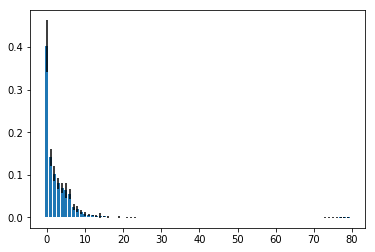

In [26]:
p = X_train.shape[1]
ix = np.argsort(test_importance)
plt.bar(x = list(reversed(range(p))), height = test_importance[ix], yerr = test_SE[ix] * 2)

## give the set of features that is above the threshold

In [27]:
varnames[1,:]

array(['H3', 'H3', 'H3', 'H3', 'H3K18ac', 'H3K18ac', 'H3K18ac', 'H3K18ac',
       'H3K27ac', 'H3K27ac', 'H3K27ac', 'H3K27ac', 'H3K27me3', 'H3K27me3',
       'H3K27me3', 'H3K36me3', 'H3K36me3', 'H3K36me3', 'H3K4me1',
       'H3K4me1', 'H3K4me1', 'H3K4me1', 'H3K4me3', 'H3K4me3', 'H3K4me3',
       'H3K4me3', 'H3K9ac', 'H3K9ac', 'H3K9ac', 'H3K9ac', 'H4K5ac',
       'H4K5ac', 'H4K5ac', 'H4K5ac', 'H4K8ac', 'H4K8ac', 'H4K8ac',
       'H4K8ac', 'input1', 'input2', 'input3', 'input4', 'wt_H3',
       'wt_H3K18ac', 'wt_H3K4me1', 'wt_ZLD', 'bcd', 'bcd', 'cad1', 'D1',
       'da2', 'dl3', 'ftz3', 'gt2', 'h', 'h', 'hb', 'hb', 'hkb', 'hkb',
       'hkb', 'kni', 'kni', 'kr', 'kr', 'mad2', 'med2', 'prdBQ', 'prdFQ',
       'run', 'run', 'shn', 'shn', 'slp', 'sna', 'sna', 'tll', 'twi',
       'twi', 'z2'], dtype='<U13')

In [29]:
selected_features = test_importance > test_SE * 2
varnames[1,selected_features]

array(['H3K18ac', 'H3K9ac', 'wt_ZLD', 'bcd', 'cad1', 'D1', 'dl3', 'gt2',
       'hb', 'hb', 'kni', 'kr', 'kr', 'med2', 'prdBQ', 'twi', 'twi'],
      dtype='<U13')